# SDD elevation line combo plot
---
Plot mean snow disappearance day of year by run implementation.  

*J. Michelle Hu  
University of Utah  
May 2025* 

In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import PurePath
import datetime
import seaborn as sns

sys.path.append('/uufs/chpc.utah.edu/common/home/u6058223/git_dirs/env/')
import helpers as h

In [2]:
# Turn off warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Set basin and WY order
basins = ['blue', 'animas', 'yampa']
# basins = ['yampa', 'animas', 'blue']
WYs = [2021, 2022, 2023, 2024]

In [4]:
# Load the csvs that are output from plot_sdd.py
workdir = '/uufs/chpc.utah.edu/common/home/skiles-group3/model_runs/'
csv_fns = h.fn_list(workdir, '*/*/*mean_sdd_elev_by_doy*.csv')

# pull basin and wy from csv fn
short_filenames = [PurePath(csv).stem for csv in csv_fns]
short_filenames

['animas_mean_sdd_elev_by_doy_wy2021',
 'animas_mean_sdd_elev_by_doy_wy2022',
 'animas_mean_sdd_elev_by_doy_wy2023',
 'animas_mean_sdd_elev_by_doy_wy2024',
 'blue_mean_sdd_elev_by_doy_wy2021',
 'blue_mean_sdd_elev_by_doy_wy2022',
 'blue_mean_sdd_elev_by_doy_wy2023',
 'blue_mean_sdd_elev_by_doy_wy2024',
 'yampa_mean_sdd_elev_by_doy_wy2021',
 'yampa_mean_sdd_elev_by_doy_wy2022',
 'yampa_mean_sdd_elev_by_doy_wy2023',
 'yampa_mean_sdd_elev_by_doy_wy2024']

In [5]:
# Load up the csvs and construct a giant dataframe
df_list = [pd.read_csv(csv, index_col=0) for csv in csv_fns]

# Add the short_filename as the first header row for all columns in the df
for df, short_filename in zip(df_list, short_filenames):
    df.columns = pd.MultiIndex.from_product([[short_filename], df.columns])

# Now merge it all together
big_df = pd.concat(df_list, axis=1)
big_df

animas_mean_sdd_elev_by_doy_wy2021                          \
                           Mean_Elev    Baseline HRRR-SPIReS   
0                             2058.0   56.746429   58.617979   
1                             2291.5   89.051166   67.566613   
2                             2525.0  105.570291   82.153502   
3                             2759.0  118.085582   97.367938   
4                             2992.5  133.434611  105.923162   
5                             3226.0  147.767093  116.638234   
6                             3459.5  159.199733  138.375334   
7                             3693.0  159.374792  162.250969   
8                             3926.5  161.518514  172.108956   
9                             4160.0  165.128830  173.417125   

  animas_mean_sdd_elev_by_doy_wy2022                          \
                           Mean_Elev    Baseline HRRR-SPIReS   
0                             2058.0   58.047091   51.822090   
1                             2291.5   85.865118   59.572210   
2                             2525.0  104.253662   79.991518   
3                             2759.0  117.559051   98.570384   
4                             2992.5  132.585619  109.855039   
5                             3226.0  145.429361  119.229898   
6                             3459.5  154.149136  131.657004   
7                             3693.0  153.635593  150.491442   
8                             3926.5  156.533262  160.119674   
9                             4160.0  160.307934  164.008641   

  animas_mean_sdd_elev_by_doy_wy2023                          \
                           Mean_Elev    Baseline HRRR-SPIReS   
0                             2058.0   92.159160   85.602920   
1                             2291.5  114.390463   97.512155   
2                             2525.0  130.606692  111.800978   
3                             2759.0  141.774598  123.187936   
4                             2992.5  156.911739  132.988247   
5                             3226.0  172.319328  144.485474   
6                             3459.5  181.863664  161.875240   
7                             3693.0  176.589469  186.074179   
8                             3926.5  179.890690  198.933431   
9                             4160.0  189.927730  205.598586   

  animas_mean_sdd_elev_by_doy_wy2024  ... yampa_mean_sdd_elev_by_doy_wy2021  \
                           Mean_Elev  ...                       HRRR-SPIReS   
0                             2058.0  ...                         79.914181   
1                             2291.5  ...                         89.178619   
2                             2525.0  ...                         98.865095   
3                             2759.0  ...                        110.821392   
4                             2992.5  ...                        120.391392   
5                             3226.0  ...                        128.513467   
6                             3459.5  ...                        139.219993   
7                             3693.0  ...                        150.486458   
8                             3926.5  ...                        164.961391   
9                             4160.0  ...                        168.563449   

  yampa_mean_sdd_elev_by_doy_wy2022                          \
                          Mean_Elev    Baseline HRRR-SPIReS   
0                            1949.0   90.406584   94.023013   
1                            2139.5  102.555636   99.736848   
2                            2330.0  119.712720  107.328525   
3                            2520.0  131.643245  115.986829   
4                            2710.0  145.252358  124.920017   
5                            2900.0  157.694572  134.574195   
6                            3090.0  167.583941  147.337552   
7                            3280.0  176.445713  158.953827   
8                            3470.0  168.523661  169.353641   
9                            3660.0  164.304753  172.

In [6]:
# for icefire, 12 colors
# cmap = sns.color_palette('icefire', 12)
# colors = [cmap[1], cmap[3], cmap[-2], cmap[-4]]

# colors = ['royalblue', 'midnightblue', 'orangered', 'firebrick']
cmap = sns.color_palette("rocket")
colors = [cmap[0], cmap[2], cmap[3], cmap[4]]
# colors = [cmap[0], cmap[1], cmap[3], cmap[5]]
# cmap = sns.color_palette("magma", 7)
# colors = [cmap[0], cmap[1], cmap[3], cmap[5]]
# colors = [cmap[0], cmap[2], cmap[4], cmap[5]]
cmap

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

In [7]:
SMALL_SIZE = 11
SMEDIUM_SIZE = 13
MEDIUM_SIZE = 14
BIGGER_SIZE = 24
BIGGEST_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

In [8]:
import numpy as np
# Take the element-wise average of cmap[4] and cmap[5]
alt_cmap_color = np.array(cmap[4]) * 0.5 + np.array(cmap[5]) * 0.5
colors = [cmap[0], cmap[1], cmap[3], alt_cmap_color]
alt_cmap_color

array([0.95949256, 0.58575066, 0.43917926])

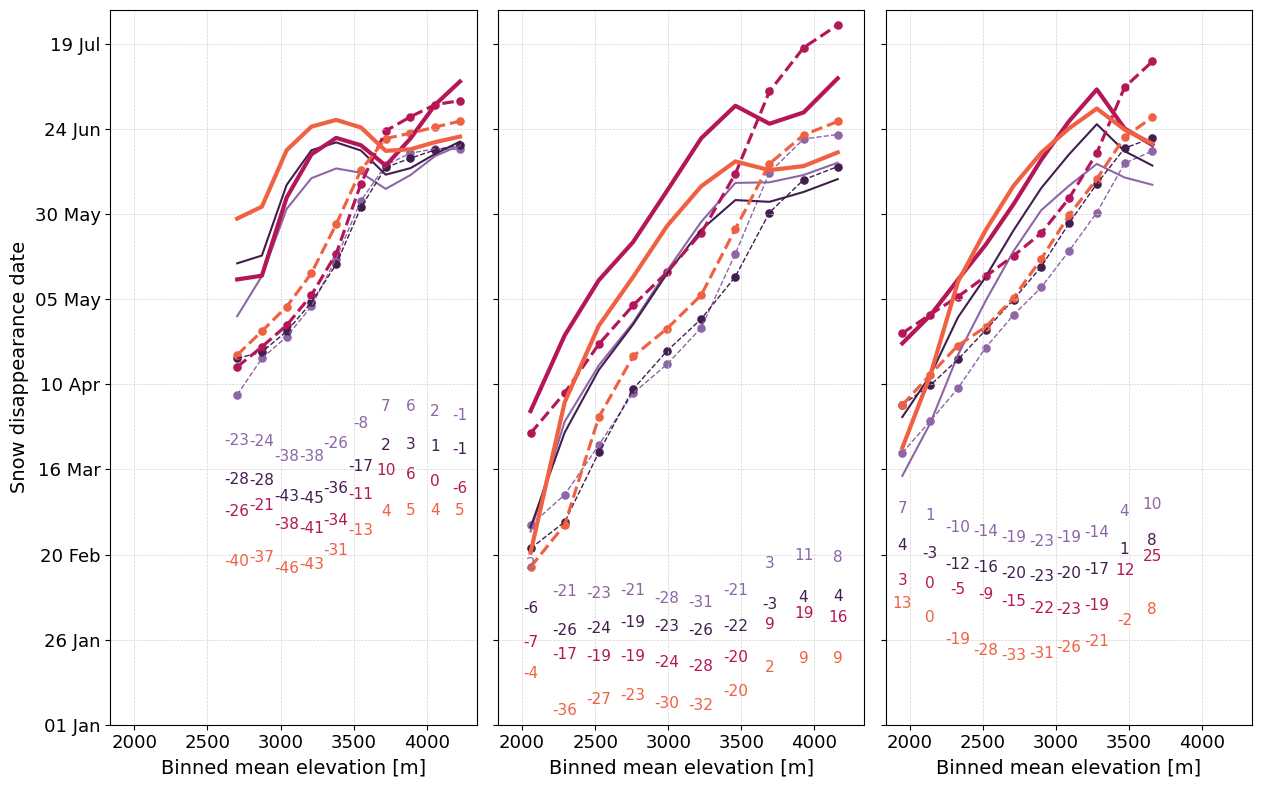

In [9]:
colors = [(0.550, 0.400, 0.650),
          (0.260, 0.117, 0.306),
          (0.704, 0.088, 0.344),
          (0.942, 0.375, 0.263)]

# colors = [(0.113094, 0.065492, 0.276784),
#             (0.512831, 0.148179, 0.507648),
#             (0.904281, 0.31961, 0.388137),
#             (0.9867, 0.535582, 0.38221)]


markerstyles = ['', 'o']
figsize = (3*4.25, 8)
lw = 1.5
markersize = 40
markerlw = 1
hsalpha = 1
ylims = (0, 210)
diff_dict = {}
fig, axa = plt.subplots(1, 3, figsize=figsize, sharex=True, sharey=True)
for jdx, (ax, basin) in enumerate(zip(axa.flatten(), basins)):
    # Extract only the data for the first basin
    basin_df = big_df[big_df.columns[big_df.columns.get_level_values(0).str.contains(basin)]]
    # Loop through WY
    for wy_offset, WY in enumerate(WYs):
        mean_elevs = basin_df[f'{basin}_mean_sdd_elev_by_doy_wy{WY}']['Mean_Elev']
        mean_baseline_doys = basin_df[f'{basin}_mean_sdd_elev_by_doy_wy{WY}']['Baseline'].values
        mean_hs_doys = basin_df[f'{basin}_mean_sdd_elev_by_doy_wy{WY}']['HRRR-SPIReS'].values
        # Plot the data
        # thicken the lines if wy is 2023 or 2024
        if WY == 2023 or WY == 2024:
            ax.scatter(mean_elevs, mean_baseline_doys, marker=markerstyles[0], s=markersize, lw=markerlw, c=colors[wy_offset])
            ax.plot(mean_elevs, mean_baseline_doys, lw=lw*2, c=colors[wy_offset])
            ax.scatter(mean_elevs, mean_hs_doys, alpha=hsalpha, marker=markerstyles[1], s=markersize/1.5, lw=markerlw, c=colors[wy_offset])
            ax.plot(mean_elevs, mean_hs_doys, lw=lw*1.5, linestyle='--', alpha=hsalpha, c=colors[wy_offset])
        else:
            ax.scatter(mean_elevs, mean_baseline_doys, marker=markerstyles[0], s=markersize, lw=markerlw, c=colors[wy_offset])
            ax.plot(mean_elevs, mean_baseline_doys, lw=lw, c=colors[wy_offset])
            ax.scatter(mean_elevs, mean_hs_doys, alpha=hsalpha, marker=markerstyles[1], s=markersize/1.5, lw=markerlw, c=colors[wy_offset])
            ax.plot(mean_elevs, mean_hs_doys, lw=lw/3*2, linestyle='--', alpha=hsalpha, c=colors[wy_offset])
        # Calculate seconds since up to january first of this water year
        elapsed_sec = pd.to_datetime([f'{WY}-01-01 00:00:00']).astype(int) / 10**9
        elapsed_sec = int(elapsed_sec[0])
        ax.grid(color='lightgrey', linestyle='--', linewidth=0.5)
        if jdx == 0:
             ax.set_ylabel('Snow disappearance date')
        ax.set_xlabel('Binned mean elevation [m]')
        ax.set_ylim(ylims)
        # Add seconds since 1970 and convert to seconds for xlabel
        ax.set_yticklabels([pd.Timestamp((c * 24 * 3600 + elapsed_sec).astype('datetime64[s]')).strftime("%d %b") for c in ax.get_yticks()])

        # Calculate the sdd_shift for easy presentation later
        diffs_by_bin = mean_hs_doys - mean_baseline_doys
        # Try to plot this below the scatter plot
        # add text of diff by bin for each mean elev bin
        if basin == 'blue':
            ystart = 90
        elif basin == 'yampa':
            ystart = 60
        else:
            ystart = 45
        for i, txt in enumerate(diffs_by_bin):
            ax.annotate(f'{txt:.0f}', (mean_elevs[i],
                                    #    mean_baseline_doys[i] - (np.abs(txt)/2) + yshift),
                                       ystart - 10 * wy_offset + txt/3),
                                       color=colors[wy_offset],
                                       ha='center'
                                       )
plt.tight_layout()

In [10]:
diff_df = pd.DataFrame(diff_dict)
diff_df

""


# Plot all on one!

In [11]:
markerstyles = ['x', 'o']
lw = 1.5
markersize = 75
markerlw = 2
hsalpha = 1
colors = [
    ['dodgerblue', 'royalblue', 'midnightblue', 'lightsteelblue'],
    ['lightcoral', 'firebrick', 'orangered', 'darkred'],
    ['lightgrey', 'dimgray', 'slategray', 'black']
]

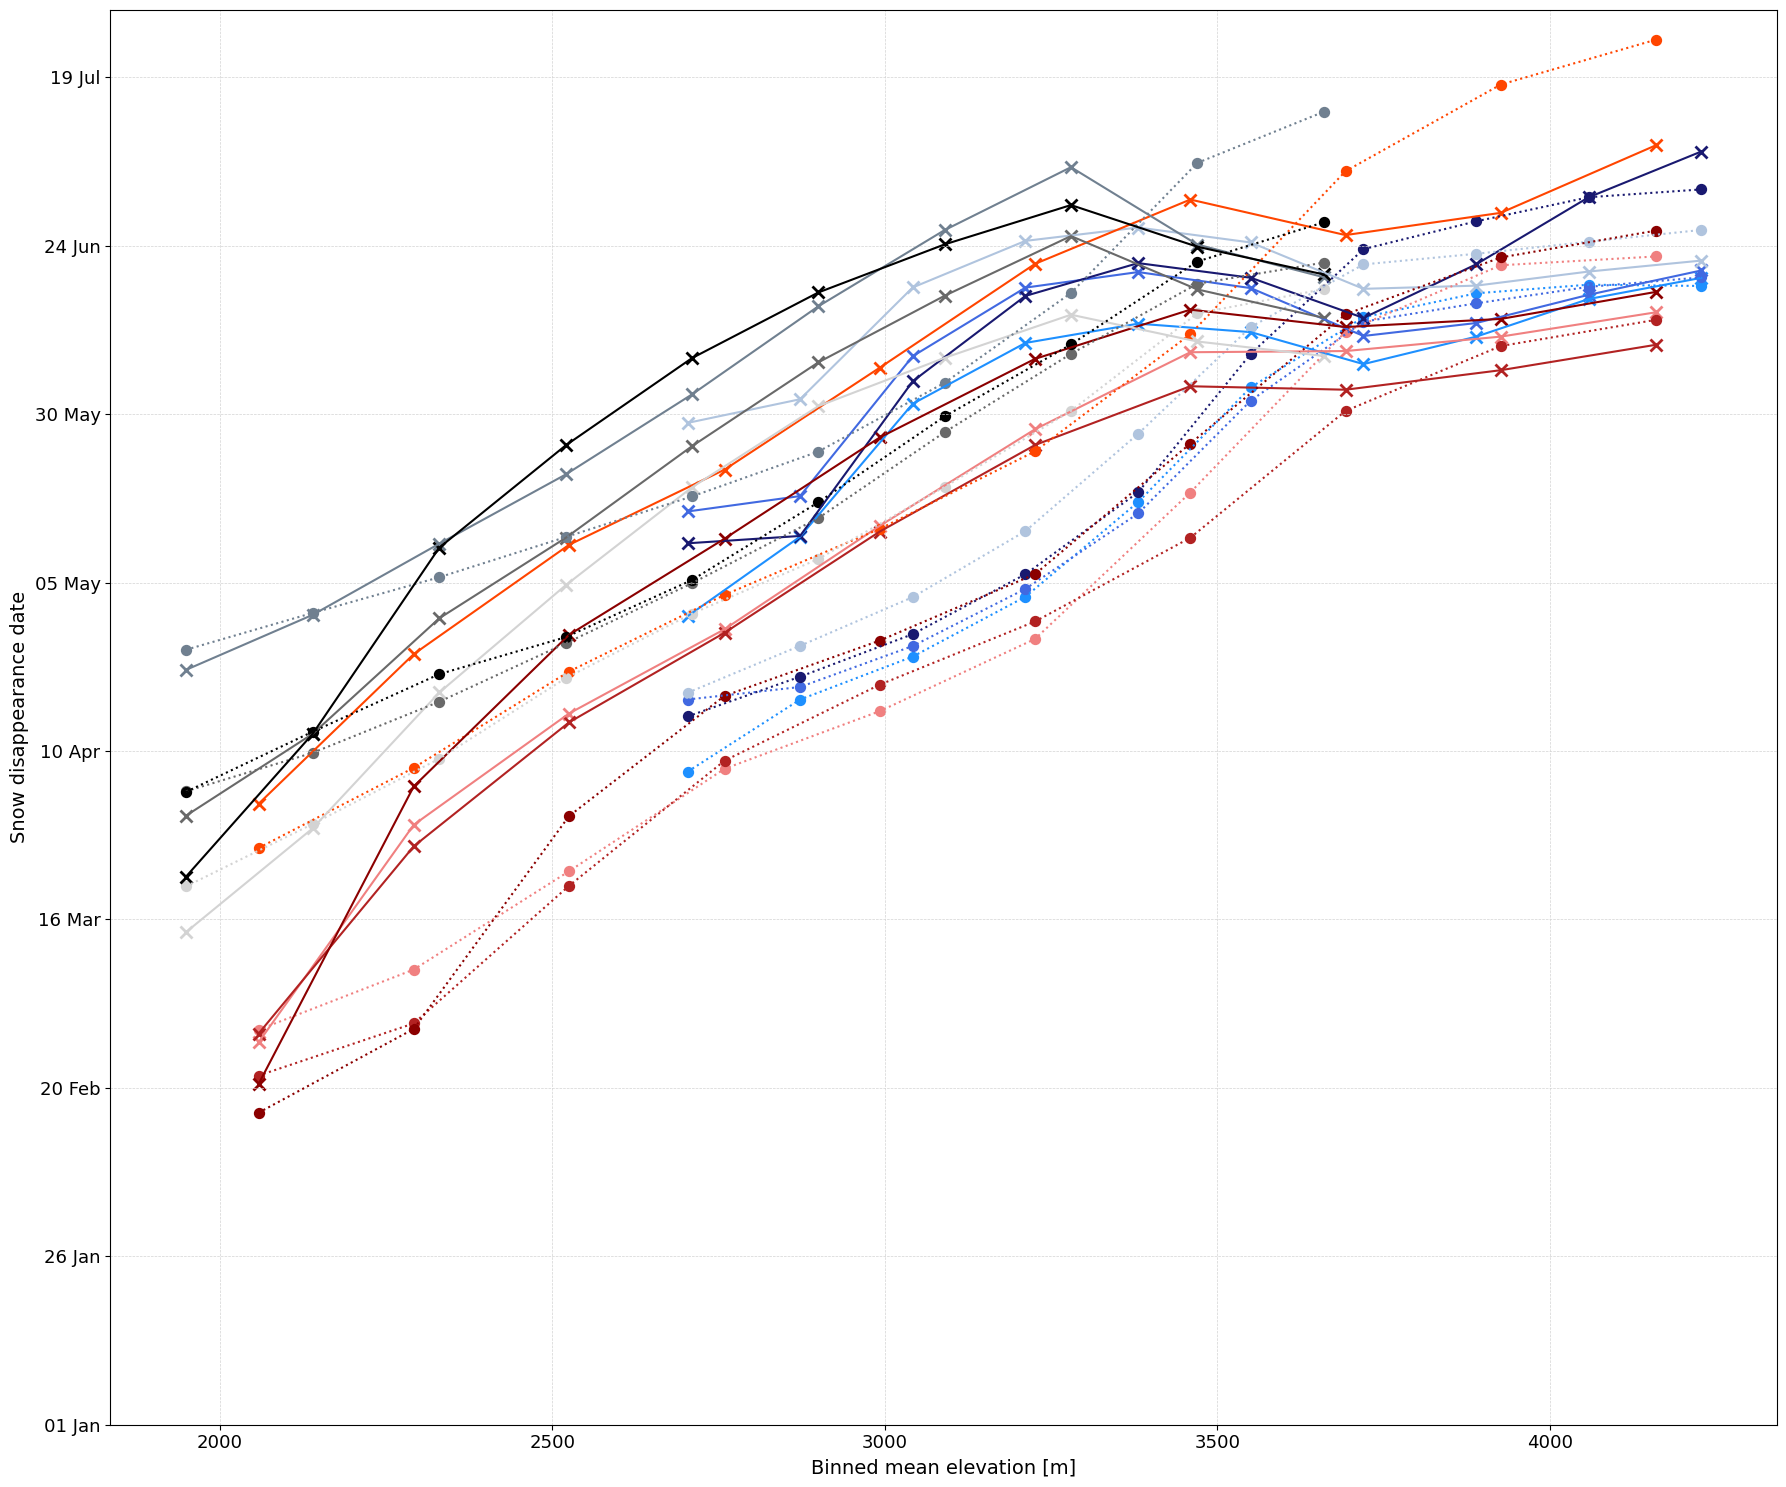

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(18, 15))
for jdx, basin in enumerate(basins):
    # Extract only the data for the first basin
    basin_df = big_df[big_df.columns[big_df.columns.get_level_values(0).str.contains(basin)]]
    # Using the names
    for wy_offset, WY in enumerate(WYs):
        mean_elevs = basin_df[f'{basin}_mean_sdd_elev_by_doy_wy{WY}']['Mean_Elev']
        mean_baseline_doys = basin_df[f'{basin}_mean_sdd_elev_by_doy_wy{WY}']['Baseline'].values
        mean_hs_doys = basin_df[f'{basin}_mean_sdd_elev_by_doy_wy{WY}']['HRRR-SPIReS'].values
        # Plot the data
        ax.scatter(mean_elevs, mean_baseline_doys, marker=markerstyles[0], s=markersize, lw=markerlw,
                   c=colors[jdx][wy_offset]
                   )
        ax.plot(mean_elevs, mean_baseline_doys, lw=lw,
                c=colors[jdx][wy_offset]
                )
        ax.scatter(mean_elevs, mean_hs_doys, alpha=hsalpha, marker=markerstyles[1], s=markersize/2, lw=markerlw,
                   c=colors[jdx][wy_offset]
                   )
        ax.plot(mean_elevs, mean_hs_doys, lw=lw,
                linestyle=':',
                alpha=hsalpha,
                c=colors[jdx][wy_offset]
                )
        # Calculate seconds since up to january first of this water year
        elapsed_sec = pd.to_datetime([f'{WY}-01-01 00:00:00']).astype(int) / 10**9
        elapsed_sec = int(elapsed_sec[0])
        ax.grid(color='lightgrey', linestyle='--', linewidth=0.5)
        # ax.legend(loc='lower right')
        if jdx == 0:
             ax.set_ylabel('Snow disappearance date')
        ax.set_xlabel('Binned mean elevation [m]')
        # ax.set_title(title)
        ax.set_ylim(ylims)
        # Add seconds since 1970 and convert to seconds for xlabel
        ax.set_yticklabels([pd.Timestamp((c * 24 * 3600 + elapsed_sec).astype('datetime64[s]')).strftime("%d %b") for c in ax.get_yticks()])
plt.tight_layout()